In [38]:
import qiskit
import qc_grader
print(f"Qiskit version: {qiskit.__version__}")
print(f"Grader version: {qc_grader.__version__}")

Qiskit version: 2.0.3
Grader version: 0.22.9


In [39]:
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(name="qgss-2025")
service.saved_accounts()

{'qgss-2025': {'channel': 'ibm_quantum_platform',
  'url': 'https://cloud.ibm.com',
  'token': 'czckea62oORN6JwhIWqF1o2J-H2lvuoa3_ZiHTm849k6',
  'instance': 'crn:v1:bluemix:public:quantum-computing:us-east:a/93ca82e55ebd4cd1b800740b8ba22e06:60d6953e-e4fc-4890-9165-5179d5182d85::',
  'verify': True,
  'private_endpoint': False}}

In [40]:
# Essential libraries
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from PIL import Image
import io

from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit.visualization import plot_histogram, plot_distribution
from qiskit_ibm_runtime import Options, Session, SamplerV2 as Sampler
from qiskit.result import marginal_distribution

from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_aer import AerSimulator

from qc_grader.challenges.qgss_2025 import (
    grade_lab1_ex1_1, 
    grade_lab1_ex1_2, 
    grade_lab1_ex1_3, 
    grade_lab1_ex1_4, 
    grade_lab1_ex2, 
    grade_lab1_ex3,
    grade_lab1_ex4,
    grade_lab1_ex5,
    grade_lab1_ex6
)

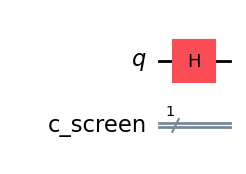

In [41]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

qr = QuantumRegister(1, name='q')
cr = ClassicalRegister(1, name='c_screen')

double_slit = QuantumCircuit(qr, cr)
# my code
# simulating the particle passing through both slits
double_slit.h(0)

# end of my code
double_slit.draw("mpl")

In [42]:
# Submit your answer using the following code
grade_lab1_ex1_1(double_slit)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


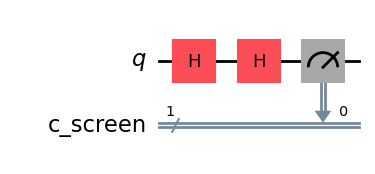

In [43]:
# Model the center of the screen (constructive interference)
double_slit.h(0)

# measuring the qubit
double_slit.measure(qr[0], cr[0])

# draw the circuit
double_slit.draw("mpl")

In [44]:
# Submit your answer using the following code
grade_lab1_ex1_2(double_slit)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


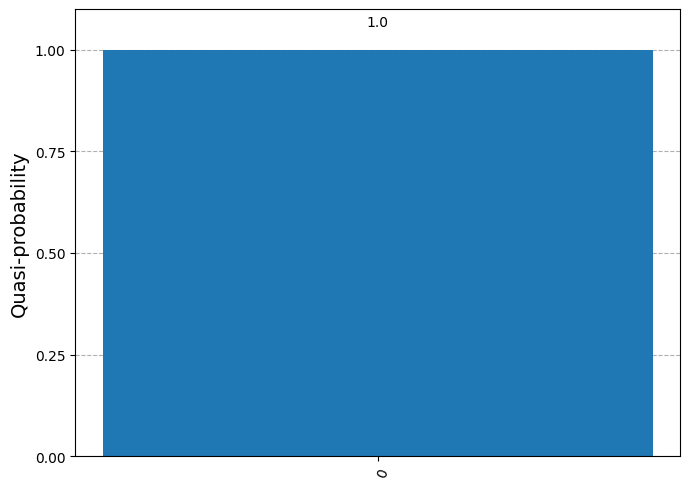

In [45]:
# use simulator
backend = AerSimulator()

# make quantum circuit compatible to the backend
pm = generate_preset_pass_manager(backend = backend, optimization_level=3)
qc_isa = pm.run(double_slit)

# run and get counts
sampler = Sampler(mode=backend)
counts = sampler.run([qc_isa], shots = 1000).result()[0].data.c_screen.get_counts()

plot_distribution(counts)

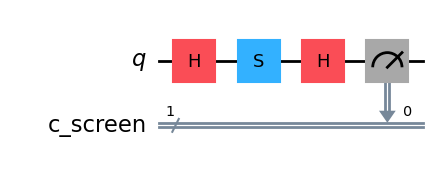

In [46]:
qr = QuantumRegister(1,name='q')
cr = ClassicalRegister(1, name='c_screen')

double_slit_with_difference = QuantumCircuit(qr, cr)
double_slit_with_difference.h(0)

# adding a phase with the P gate (superposed state of 1)
double_slit_with_difference.s(0)

double_slit_with_difference.h(0)
double_slit_with_difference.measure(qr, cr)
double_slit_with_difference.draw('mpl')

In [47]:
# Submit your answer using the following code
grade_lab1_ex1_3(double_slit_with_difference)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


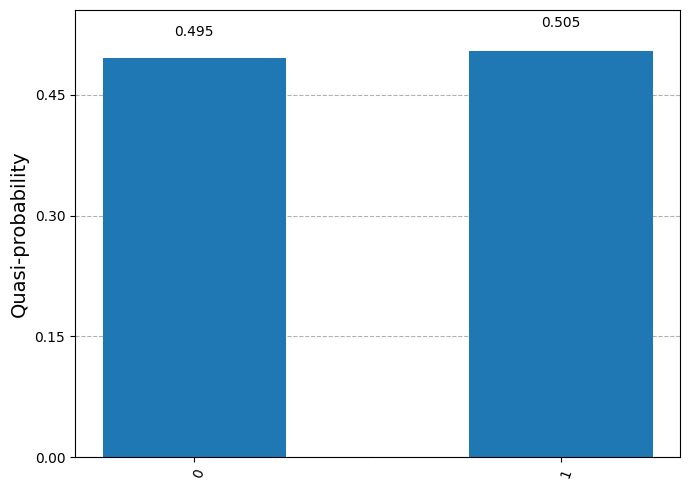

In [48]:
qc_isa = pm.run(double_slit_with_difference)

#run and get counts
sampler = Sampler(mode=backend)
counts = sampler.run([qc_isa], shots=10000).result()[0].data.c_screen.get_counts()
plot_distribution(counts)

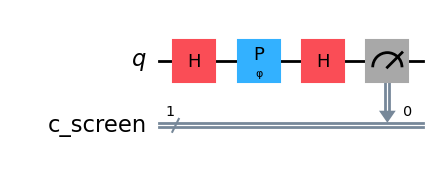

In [49]:
φ = Parameter('φ')

qr = QuantumRegister(1, name='q')
cr = ClassicalRegister(1, name='c_screen')

double_slit_fringe = QuantumCircuit(qr, cr)

# add an H gate
double_slit_fringe.h(0)
double_slit_fringe.p(φ, 0)
double_slit_fringe.h(0)
double_slit_fringe.measure(qr, cr)

double_slit_fringe.draw('mpl')

In [50]:
# Submit your answer using the following code
grade_lab1_ex1_4(double_slit_fringe)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


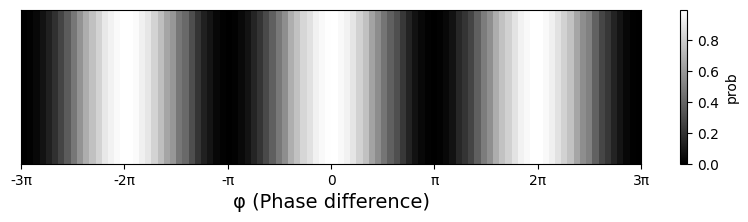

In [51]:
φ_lst = np.linspace(-3*np.pi, 3*np.pi, 100)
qc_isa = pm.run(double_slit_fringe)

φ_hit = []
dist = sampler.run([(qc_isa, φ_lst)], shots=1000).result()[0].data.c_screen

for i  in range(len(φ_lst)):
    result = dist[i].get_counts()
    if '0' in result:
        φ_hit.append(result['0']/1000)
    else:
        φ_hit.append(0)

#plot heat map
φ_hit_2d = np.array(φ_hit).reshape(1, -1)

plt.figure(figsize=(10, 2))
plt.imshow(φ_hit_2d, cmap='gray', aspect='auto', extent=[-3*np.pi, 3*np.pi, 0, 0.1])

plt.xlabel('φ (Phase difference)', fontsize=14)
plt.colorbar(label='prob')
plt.xticks(ticks=[-3*np.pi, -2*np.pi, -np.pi, 0, np.pi, 2*np.pi, 3*np.pi],
           labels=['-3π', '-2π', '-π', '0', 'π', '2π', '3π'])
plt.yticks([])  
plt.show()

In [52]:
from qc_grader.grader.grade import check_lab_completion_status
check_lab_completion_status("qgss_2025")

Lab 0: 2/2 exercises completed (100%)
    ✅ 1615 participants have completed this lab
Lab 1: 8/9 exercises completed (89%)
    ✅ 844 participants have completed this lab
Lab 2: 0/7 exercises completed (0%)
    ✅ 17 participants have completed this lab
Lab 3: 0/5 exercises completed (0%)
    ✅ 0 participants have completed this lab
Lab 4: 0/6 exercises completed (0%)
    ✅ 0 participants have completed this lab


In [53]:
def schrodingers_cat_experiment_theta(theta):
    qc = QuantumCircuit(1)

    # add an R gate
    qc.rx(theta, 0)

    # measure the state
    # qc.measure(1)

    qc.measure_all()

    backend = AerSimulator()
    pm = generate_preset_pass_manager(backend=backend, optimization_level=3)
    qc_isa = pm.run(qc)

    # Circuit compile and run, shot = 1
    sampler = Sampler(mode=backend)
    counts = sampler.run([qc_isa], shots=1).result()[0].data.meas.get_counts()

    measured_state = list(counts.keys())[0] if counts else '0' # bring measured result

    if measured_state == '0':
        cat_happy = True
    else:
        cat_happy = False

    return cat_happy, qc

In [54]:
# Submit your answer using the following code
grade_lab1_ex2(schrodingers_cat_experiment_theta)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


In [55]:
happy_img = Image.open('happy.png')
grumpy_img = Image.open('grumpy.png')

out = widgets.Output()

slider = widgets.FloatSlider(
    value=0,
    min=0,
    max=2*np.pi,
    step=0.01,
    description='θ',
    continuous_update=True
)

button = widgets.Button(
    description='Open the Box',
    button_style='success'
)
    
def on_button_click(b):
    with out:
        out.clear_output(wait=True)  # clean output

        result = schrodingers_cat_experiment_theta(slider.value)[0]

        if result==True:
            img = happy_img
            txt = "happy"
        else:
            img = grumpy_img
            txt = "grumpy"

        new_size = (400, 400)
        resized_img = img.resize(new_size)
        
        buf = io.BytesIO()
        resized_img.save(buf, format='PNG')
        buf.seek(0)
        probability = int(np.cos(slider.value/2)**2 * 100)

        display(f"The probability of cat is happy: {probability}%")
        display(f"The observed cat is : {txt}")
        display(widgets.Image(value=buf.read(), format='png'))

button.on_click(on_button_click)

display(slider, button, out)

FloatSlider(value=0.0, description='θ', max=6.283185307179586, step=0.01)

Button(button_style='success', description='Open the Box', style=ButtonStyle())

Output()

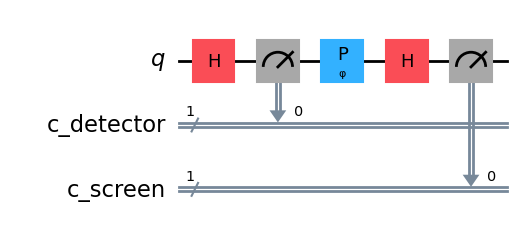

In [56]:
qr = QuantumRegister(1, name='q')
cr1 = ClassicalRegister(1, name='c_detector')
cr2 = ClassicalRegister(1, name='c_screen')
double_slit_with_detector = QuantumCircuit(qr, cr1, cr2)

φ = Parameter('φ')

double_slit_with_detector.h(0)
double_slit_with_detector.measure(qr, cr1)
double_slit_with_detector.p(φ, 0)
double_slit_with_detector.h(0)
double_slit_with_detector.measure(qr, cr2)

double_slit_with_detector.draw('mpl')

In [57]:
# Submit your answer using the following code
grade_lab1_ex3(double_slit_with_detector)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


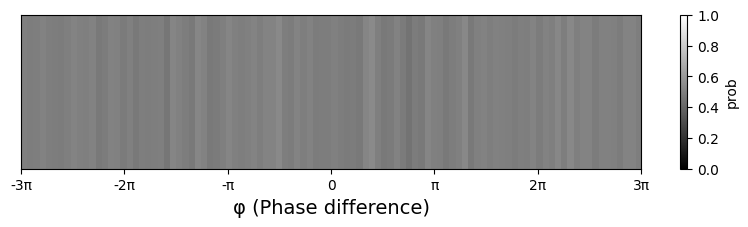

In [58]:
φ_lst = np.linspace(-3 * np.pi, 3 * np.pi, 100)
qc_isa = pm.run(double_slit_with_detector)

φ_hit = []
dist = sampler.run([(qc_isa, φ_lst)], shots=1000).result()[0].data.c_screen

for i  in range(len(φ_lst)):
    result = dist[i].get_counts()
    if '0' in result:
        φ_hit.append(result['0']/1000)
    else:
        φ_hit.append(0)

φ_hit_2d = np.array(φ_hit).reshape(1, -1)

plt.figure(figsize=(10, 2))
plt.imshow(φ_hit_2d, cmap='gray', aspect='auto', extent=[-3*np.pi, 3*np.pi, 0, 0.1], vmin=0, vmax=1)

plt.xlabel('φ (Phase difference)', fontsize=14)
plt.colorbar(label='prob')
plt.xticks(ticks=[-3 * np.pi, -2 * np.pi, -np.pi, 0, np.pi, 2 * np.pi, 3 * np.pi],
           labels=['-3π', '-2π', '-π', '0', 'π', '2π', '3π'])
plt.yticks([])  
plt.show()

In [22]:
import numpy as py

def create_chsh_circuit(x, y):
    """Builds Qiskit circuit for Alice & Bob's quantum strategy."""
    qc = QuantumCircuit(2, 2, name=f'CHSH_{x}{y}') # 2 qubits, 2 classical bits

    # Implement the gates to create the Bell state |Φ+> = (|00> + |11>)/sqrt(2)
    qc.h(0)
    qc.cx(0, 1)

    qc.barrier()
    # Alice's measurement basis (X if x=1, Z if x=0)
    if x == 1:
        qc.h(0) # H for X-basis measurement

    #Bob's measurement basis (-π/4 if y=0, or angle π/4 if y=1)
    if y == 0:
        qc.ry(-py.pi/4, 1)
    elif y == 1:
        qc.ry(py.pi/4, 1)

    qc.barrier()
    
    # Step 3: Measure
    qc.measure([0, 1], [0, 1]) # q0 to c0 (Alice), q1 to c1 (Bob) -> 'ba' format

    return qc

In [59]:
# Submit your answer using the following code
grade_lab1_ex4(create_chsh_circuit)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


Quantum circuit for inputs x=1, y=1 (Check your Exercises 1 & 2 implementation):


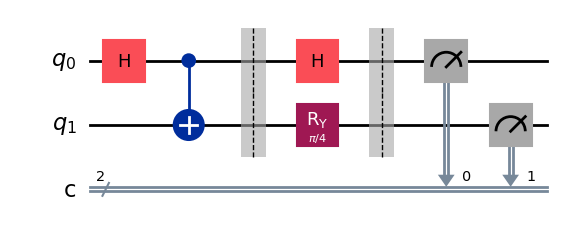

In [60]:
circuits = []
input_pairs = []
for x_in in [0, 1]:
    for y_in in [0, 1]:
        input_pairs.append((x_in, y_in))
        circuits.append(create_chsh_circuit(x_in, y_in))

print("Quantum circuit for inputs x=1, y=1 (Check your Exercises 1 & 2 implementation):")
if len(circuits) == 4:
    display(circuits[3].draw('mpl')) # (x,y) = (1,1)
else:
    print("Circuits not generated. Run previous cell after completing Exercises 1 & 2.")

Preparing circuits for the simulator...

--- Simulation Results (Counts) ---
Inputs (x=0, y=0):
  Outcomes (ba): {'00': 448, '01': 56, '10': 63, '11': 457}
Inputs (x=0, y=1):
  Outcomes (ba): {'00': 428, '01': 70, '10': 71, '11': 455}
Inputs (x=1, y=0):
  Outcomes (ba): {'00': 473, '01': 78, '10': 71, '11': 402}
Inputs (x=1, y=1):
  Outcomes (ba): {'00': 73, '01': 417, '10': 440, '11': 94}

Plotting results...


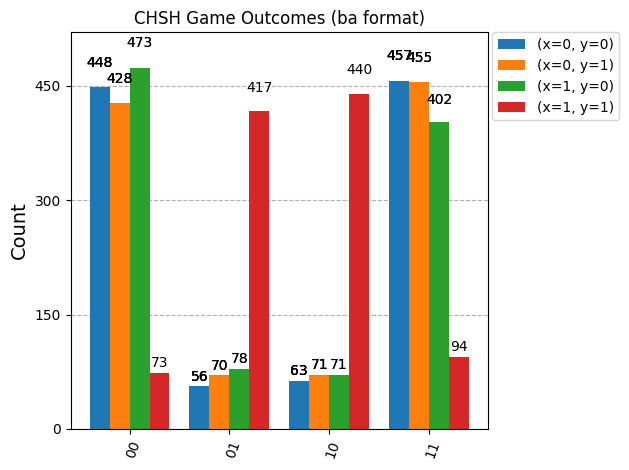

In [61]:
SHOTS = 1024

print("Preparing circuits for the simulator...")
isa_qc_chsh = pm.run(circuits)

sampler_chsh = Sampler(mode=backend) # SamplerV2
job_chsh = sampler_chsh.run(isa_qc_chsh, shots=SHOTS)
results_chsh = job_chsh.result()

# SamplerV2: results_chsh[i].data.c.get_counts() where 'c' is the default name of classical register
counts_list = [results_chsh[i].data.c.get_counts() for i in range(len(circuits))]

print("\n--- Simulation Results (Counts) ---")
for i, (x, y) in enumerate(input_pairs):
    print(f"Inputs (x={x}, y={y}):")
    sorted_counts = dict(sorted(counts_list[i].items()))
    print(f"  Outcomes (ba): {sorted_counts}")

print("\nPlotting results...")
display(plot_histogram(counts_list,
                       legend=[f'(x={x}, y={y})' for x, y in input_pairs],
                       title='CHSH Game Outcomes (ba format)'))

In [62]:
win_probabilities = {}
print("--- Calculating Win Probabilities ---")

for i, (x, y) in enumerate(input_pairs):
    counts = counts_list[i]

    # Target (a XOR b) value for winning
    target_xor_result = x & y

    wins_for_this_case = 0

    # Calculate the total number of shots that satisfy the winning condition determined above. Check the 'target_xor_result'
    for bitstring, count in counts.items():
        a = int(bitstring[0])
        b = int(bitstring[1])
        if a ^ b == target_xor_result:
            wins_for_this_case = wins_for_this_case + count

    prob = wins_for_this_case / SHOTS if SHOTS > 0 else 0
    win_probabilities[(x, y)] = prob
    print(f"Inputs (x={x}, y={y}): Target (a XOR b) = {target_xor_result}. Win Probability = {prob:.4f}")

avg_win_prob = sum(win_probabilities.values()) / 4.0
P_win_quantum_theory = np.cos(np.pi / 8)**2  # ~0.8536
P_win_classical_limit = 0.75

print("\n--- Overall Performance ---")
print(f"Experimental Average Win Probability: {avg_win_prob:.4f}")
print(f"Theoretical Quantum Win Probability: {P_win_quantum_theory:.4f}")
print(f"Classical Limit Win Probability:     {P_win_classical_limit:.4f}")

if avg_win_prob > P_win_classical_limit + 0.01: # Allow for small simulation variance
    print(f"\nSuccess! Your result ({avg_win_prob:.4f}) clearly beats the classical 75% limit!")
    print(f"It's likely close to the theoretical quantum prediction of {P_win_quantum_theory:.4f}.")
elif avg_win_prob > P_win_classical_limit - 0.02 : # Could be noise or minor error
     print(f"\nClose, but no cigar? Your result ({avg_win_prob:.4f}) is around the classical limit ({P_win_classical_limit:.4f}).")
     print("Check your solutions for Exercises 1-4 carefully, especially the win counting logic in Ex 4.")
else:
    print(f"\nHmm, the result ({avg_win_prob:.4f}) is unexpectedly low, even below the classical limit.")
    print("There might be an error in Exercises 1-4. Please review your circuit and analysis code.")

--- Calculating Win Probabilities ---
Inputs (x=0, y=0): Target (a XOR b) = 0. Win Probability = 0.8838
Inputs (x=0, y=1): Target (a XOR b) = 0. Win Probability = 0.8623
Inputs (x=1, y=0): Target (a XOR b) = 0. Win Probability = 0.8545
Inputs (x=1, y=1): Target (a XOR b) = 1. Win Probability = 0.8369

--- Overall Performance ---
Experimental Average Win Probability: 0.8594
Theoretical Quantum Win Probability: 0.8536
Classical Limit Win Probability:     0.7500

Success! Your result (0.8594) clearly beats the classical 75% limit!
It's likely close to the theoretical quantum prediction of 0.8536.


In [63]:
# Submit your answer using the following code
grade_lab1_ex5(counts_list, avg_win_prob)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


Full Teleportation Circuit (Check your Exercises 1, 2, 3):


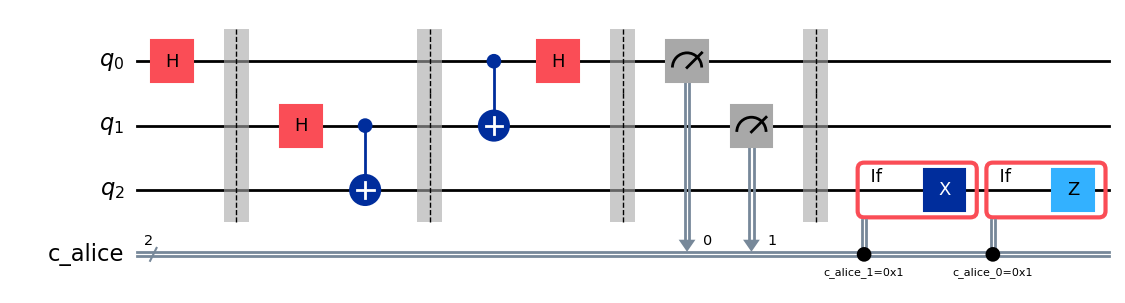

In [66]:
from qiskit.circuit.library import XGate, ZGate

# Define quantum and classical registers
qr_tele = QuantumRegister(3, name='q')
cr_alice_tele = ClassicalRegister(2, name='c_alice') # For Alice's measurements

# For verification with statevector, we don't measure Bob's final qubit in this circuit.
# If we were to run on hardware and verify by counts, we'd add a classical bit for Bob.
teleport_qc = QuantumCircuit(qr_tele, cr_alice_tele, name='Teleportation')

# Prepare Alice's message state |ψ> = |+> on q0
teleport_qc.h(qr_tele[0])
teleport_qc.barrier()

# ---- TODO : Task 1 ---
# Step 1: Create Bell pair between q1 (Alice) and q2 (Bob)
teleport_qc.h(qr_tele[1])
teleport_qc.cx(qr_tele[1], qr_tele[2])
# --- End of TODO --
teleport_qc.barrier()

# ---- TODO : Task 2 ---
# Step 2: Alice's Bell Measurement (gates part))
teleport_qc.cx(qr_tele[0], qr_tele[1])
teleport_qc.h(qr_tele[0])
# --- End of TODO --
teleport_qc.barrier()

# Alice measures her qubits q0 and q1
teleport_qc.measure(qr_tele[0], cr_alice_tele[0]) # q0 -> c0
teleport_qc.measure(qr_tele[1], cr_alice_tele[1]) # q1 -> c1
teleport_qc.barrier()

# ---- TODO : Task 3 ---
# Step 3: Bob's Conditional Corrections on q2
# IMPORTANT: .c_if() on gates like XGate() no longer works directly as in older Qiskit versions.
# The recommended method in Qiskit 1.0+ is to use the new `if_test` context manager.
with teleport_qc.if_test((cr_alice_tele[1], 1)):
    teleport_qc.x(qr_tele[2])  # Apply X if c1 == 1

with teleport_qc.if_test((cr_alice_tele[0], 1)):
    teleport_qc.z(qr_tele[2])  # Apply Z if c0 == 1

# --- End of TODO --

print("Full Teleportation Circuit (Check your Exercises 1, 2, 3):")
display(teleport_qc.draw('mpl'))

In [67]:
# Submit your answer using the following code
grade_lab1_ex6(teleport_qc)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


In [68]:
from qc_grader.grader.grade import check_lab_completion_status
check_lab_completion_status("qgss_2025")

Lab 0: 2/2 exercises completed (100%)
    ✅ 1615 participants have completed this lab
Lab 1: 9/9 exercises completed (100%)
    ✅ 845 participants have completed this lab
Lab 2: 0/7 exercises completed (0%)
    ✅ 17 participants have completed this lab
Lab 3: 0/5 exercises completed (0%)
    ✅ 0 participants have completed this lab
Lab 4: 0/6 exercises completed (0%)
    ✅ 0 participants have completed this lab


In [69]:
%matplotlib inline

# Use Statevector Simulator
print("Using statevector simulator...")
sv_simulator = AerSimulator(method='statevector') # Explicitly set method for clarity
teleport_qc_sv = teleport_qc.copy() # Work with a copy for statevector simulation
teleport_qc_sv.save_statevector() # Save statevector at the end

print("Running statevector simulation...")
job_sv = sv_simulator.run(teleport_qc_sv) # shots=1 is default for statevector
result_sv = job_sv.result()

if result_sv.success:
    print("Simulation successful.")
    final_statevector = result_sv.get_statevector()
    print("Statevector retrieved successfully.")
    print("\nVisualizing final qubit states (q2 should match initial q0 state |+>):")
    # q0 was |+> (points along +X). After teleportation, q2 should be |+>.
    # q0 and q1 states are after Alice's measurement, so they'll be collapsed.
    
    display("TODO") #TODO, use plot_bloch_multivector to plot final_state
        
else:
    print(f"Statevector simulation failed! Status: {result_sv.status}")

Using statevector simulator...
Running statevector simulation...
Simulation successful.
Statevector retrieved successfully.

Visualizing final qubit states (q2 should match initial q0 state |+>):


'TODO'

In [70]:
#Check your submission status with the code belowf
from qc_grader.grader.grade import check_lab_completion_status
check_lab_completion_status("qgss_2025")

Lab 0: 2/2 exercises completed (100%)
    ✅ 1617 participants have completed this lab
Lab 1: 9/9 exercises completed (100%)
    ✅ 846 participants have completed this lab
Lab 2: 0/7 exercises completed (0%)
    ✅ 19 participants have completed this lab
Lab 3: 0/5 exercises completed (0%)
    ✅ 0 participants have completed this lab
Lab 4: 0/6 exercises completed (0%)
    ✅ 0 participants have completed this lab
